
Dont forget you will need to restart the kernel for any edits you have made to Analysis.py to take effect, before running RunAnalysis.py!

Welcome to JupyROOT 6.26/06
Please enter a comma-seperated list of decay chains.
Use '+' to add data sets together.
Write 'text' if you would prefer to read a list from 'input.txt':
Hyy

Would you like to run in fast mode to only analyse 1% of data? (yes/no)
no
Analysing Hyy...
ttHyy
2.545 seconds
ggHyy
3.870 seconds
VBFHyy
1.761 seconds
WHyy
0.477 seconds
ZHyy
0.878 seconds
Run completed!
Plotting Hyy.root


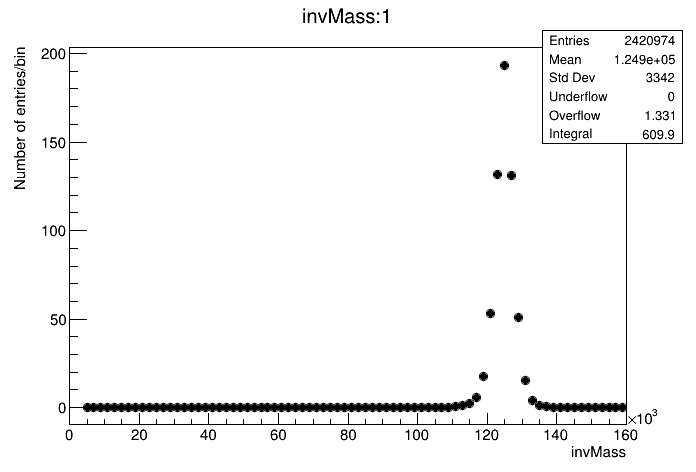

In [1]:
import RunAnalysis
canvases = RunAnalysis.main()

# MC FIT

0.15866959103941758
DSCB constant: 0.16             error: 0.00
DSCB mean: 125e3 + 0.01 [GeV]   error: 0.00
DSCB sigma: 2.37 [GeV]          error: 0.00
DSCB alpha low: 1.40            error: 0.01
DSCB n low: 12.60               error: 0.56
DSCB alpha high: 1.48           error: 0.01
DSCB n high: 80.00              error: 1.18
--------------------------------------------------
Chisquared / ndf: 1259.3069 / 28 = 44.975245680111932244926720
Total MC entries (original data): 609.34
Entries of fitted function (Total): 304.14
Entries of fitted function (Signal): 279.65
Signal efficiency: 0.5015371533537888
 FCN=25116.8 FROM MIGRAD    STATUS=CONVERGED     134 CALLS         135 TOTAL
                     EDM=3.21862e-11    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.47011e-01   1.90854e-04   1.08720e-05  -2.76329e-02
   2  p1          

Warning in <TCanvas::Constructor>: Deleting canvas with same name: FF
Warning in <Fit>: Abnormal termination of minimization.
Info in <TCanvas::Print>: pdf file Sig_fit_nocuts_gaus_3.pdf has been created


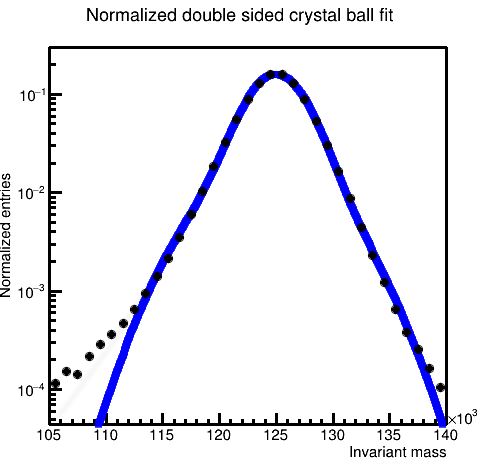

In [51]:
import ROOT as r
import numpy as np
import math
from FitFunctions import *
from PlotSetting import *

canvas = r.TCanvas("FF")
# f_Hyy = r.TFile.Open("out/Final_combinations/MC_final_8.root", "READ")  
f_Hyy = r.TFile.Open("out/S_B/MC_cut0.root")
invMass_MC = f_Hyy.Get("invMass")
invMass_MC.SetDirectory(0)
f_Hyy.Close()

# Copies of the original data object
invMass_MC_0 = invMass_MC.Clone("Original invMass") # Used for plotting original data
invMass_MC_dscb = invMass_MC.Clone("dcsb fit invMass") # Used for fitting 
invMass_MC_gaus = invMass_MC.Clone("Gaus fit")
invMass_MC_gaus_3 = invMass_MC.Clone("Gaus3 fit")

dscb = r.TF1("dscb", double_sided_crystal_ball, 105e3, 140e3, 7)
gaus1 = r.TF1("gaus1", gaus_1, 105e3, 140e3, 3)
gaus3 = r.TF1("gaus3", gaus_3, 105e3, 140e3, 9)

dscb.SetParameters(1, 125e3, 2e3, 1.5, 12, 1.5, 20)  # Parameter for no cuts
# dscb.SetParameters(1, 125e3, 1e3, 1, 14, 1.5, 30) # Parameter for numcuts+ptcut
dscb.SetParLimits(0, 0, 100)
#dscb.SetParLimits(2, 0 , 2e3) # sigma
dscb.SetParLimits(3, 0.1, 2) # a1
dscb.SetParLimits(4, 1, 15) # n1
dscb.SetParLimits(5, 0.1, 2) # a2
dscb.SetParLimits(6, 1, 80) # n2

gaus1.SetParameters(1, 125e3, 2e3)
gaus3.SetParameters(1, 125e3, 2e3, 1, 100e3, 2e3, 1, 145e3, 2e3)


# Normalize the data
norm = invMass_MC.Integral()   # The total integral of MC data
invMass_MC_0.Scale(1 / norm)   # Normalize the data
invMass_MC_dscb.Scale(1 / norm) # Normalize the data to be fitted
invMass_MC_gaus.Scale(1 / norm)
invMass_MC_gaus_3.Scale(1 / norm)
	
# Perfrom the fit
fit_result = invMass_MC_dscb.Fit("dscb", "M, R, S, Q")
invMass_MC_gaus.Fit("gaus1")
invMass_MC_gaus_3.Fit("gaus3")

# Fitted function TF1 object
fitted_dscb = invMass_MC_dscb.GetFunction("dscb")  # Fitted function 
fitted_gaus = invMass_MC_gaus.GetFunction("gaus1")
fitted_gaus_3 = invMass_MC_gaus_3.GetFunction("gaus3")

# Parameter results
dscb_fit_pars = fitted_dscb.GetParameters()
print(dscb_fit_pars[0])
dscb_const = fitted_dscb.GetParameter(0)
dscb_mean  = fitted_dscb.GetParameter(1)
dscb_sigma = fitted_dscb.GetParameter(2)
dscb_alow  = fitted_dscb.GetParameter(3)
dscb_nlow  = fitted_dscb.GetParameter(4)
dscb_ahigh = fitted_dscb.GetParameter(5)
dscb_nhigh = fitted_dscb.GetParameter(6)

dscb_const_err = fitted_dscb.GetParError(0)
dscb_mean_err  = fitted_dscb.GetParError(1)
dscb_sigma_err = fitted_dscb.GetParError(2)
dscb_alow_err  = fitted_dscb.GetParError(3)
dscb_nlow_err  = fitted_dscb.GetParError(4)
dscb_ahigh_err = fitted_dscb.GetParError(5)
dscb_nhigh_err = fitted_dscb.GetParError(6)

# Statistical results
chisquared = fit_result.MinFcnValue()   
ndf = fit_result.Ndf()
prob = fitted_dscb.GetProb()

# Get Integral of Data
int_func_tot = fitted_dscb.Integral(100e3, 140e3)
int_func_sig = fitted_dscb.Integral(120e3, 130e3)


# Print results
print("=================================================")
print(f"DSCB constant: {dscb_const:.2f}             error: {dscb_const_err:.2f}")
print(f"DSCB mean: 125e3 + {(125e3 - dscb_mean) / 1e3:.2f} [GeV]   error: {dscb_mean_err/2e3:.2f}")
print(f"DSCB sigma: {(dscb_sigma / 1e3):.2f} [GeV]          error: {dscb_sigma_err/2e3:.2f}")
print(f"DSCB alpha low: {dscb_alow:.2f}            error: {dscb_alow_err:.2f}")
print(f"DSCB n low: {dscb_nlow:.2f}               error: {dscb_nlow_err:.2f}")
print(f"DSCB alpha high: {dscb_ahigh:.2f}           error: {dscb_ahigh_err:.2f}")
print(f"DSCB n high: {dscb_nhigh:.2f}              error: {dscb_nhigh_err:.2f}")
print("--------------------------------------------------")
# print(f"Probability: {prob:.15f}")
print(f"Chisquared / ndf: {chisquared:.4f} / {ndf} = {chisquared / ndf:.24f}")
print(f"Total MC entries (original data): {norm:.2f}")
print(f"Entries of fitted function (Total): {int_func_tot * norm / 2e3:.2f}")
print(f"Entries of fitted function (Signal): {int_func_sig * norm / 2e3:.2f}")
print(f"Signal efficiency: {int_func_sig * norm / (2e3 * 557.58)}")
print("=================================================")

# Configuing plot
r.gStyle.SetOptFit(0)   
r.gPad.SetLogy(1)
r.gPad.SetFrameLineWidth(3)
r.gStyle.SetErrorX(0)
r.gStyle.SetLineWidth(3)

invMass_MC_0.SetLineColor(1)
invMass_MC_0.SetMarkerStyle(8)
invMass_MC_0.SetMarkerSize(1)
invMass_MC_0.SetMarkerColor(1)

fitted_dscb.SetLineColorAlpha(4, 0)
fitted_gaus.SetLineColorAlpha(4, 0.7)
fitted_gaus_3.SetLineColorAlpha(4, 0.7)
fitted_dscb.SetLineWidth(7)
fitted_gaus.SetLineWidth(7)
fitted_gaus_3.SetLineWidth(7)

set_canvas_size(500, 500)
set_titles(fitted_dscb, "Normalized double sided crystal ball fit", "Invariant mass", "Normalized entries")
set_label(invMass_MC_0, 0.15, 0.15)

fitted_dscb.Draw("")
# fitted_gaus.Draw("SAME")
fitted_gaus_3.Draw("SAME")
invMass_MC_0.Draw("SAME, E")

canvas.Draw()
canvas.SaveAs("Sig_fit_nocuts_gaus_3.pdf")


# DATA FIT

Fitted parameters for the total data: 
2058.30923561207  0.446218972907922  -8.026763043811905e-06  4.895290397561733e-11  -1.0237001625638745e-16
Errors: 4.466e+04  1.389  1.609e-05  8.227e-11  1.567e-16
[120e3, 130e3] Integral: 15210.34
--------------------------------------------------------------------------------------
Fitted parameters for the background only data: 
5844.4461380754765  0.3857947091025462  -7.967904714131158e-06  5.172503250660141e-11  -1.1303205467947988e-16
Errors: 82.3  0.0008525  6.231e-09  4.045e-14  2.22e-19
[120e3, 130e3] Integral: 15034.66
BKG rej. : 0.9642835083701558
--------------------------------------------------------------------------------------
 FCN=16.6887 FROM HESSE     STATUS=NOT POSDEF     31 CALLS         225 TOTAL
                     EDM=5.78992e-08    STRATEGY= 1      ERR MATRIX NOT POS-DEF
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  

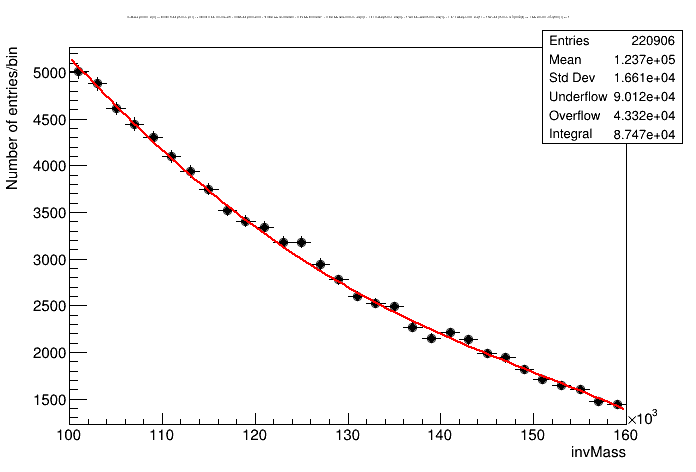

In [4]:
import ROOT as r
from ROOT import *
from FitFunctions import *
import os
import sys
import math
from PlotSetting import *

canvas = r.TCanvas("1")

# f_invMass = r.TFile("out/pt_tot_120_350.root", "READ")
f_invMass = r.TFile("out/Final_combinations/DATA_final_11.root", "READ")
invMass = f_invMass.Get("invMass")
invMass.SetDirectory(0)
f_invMass.Close()

invMass_qt = invMass.Clone("Total fit") 
invMass_qb = invMass.Clone("Background fit") 

# Fit the total data
invMass_qt.Fit("pol4", "Q, S")
fitted_qt = invMass_qt.GetFunction("pol4")
# Get results
qt_p0 = fitted_qt.GetParameter(0)
qt_p1 = fitted_qt.GetParameter(1)
qt_p2 = fitted_qt.GetParameter(2)
qt_p3 = fitted_qt.GetParameter(3)
qt_p4 = fitted_qt.GetParameter(4)
qt_p0_err = fitted_qt.GetParError(0)
qt_p1_err = fitted_qt.GetParError(1)
qt_p2_err = fitted_qt.GetParError(2)
qt_p3_err = fitted_qt.GetParError(3)
qt_p4_err = fitted_qt.GetParError(4)
# Integral in the region [120e3, 130e3]
rint_tot = fitted_qt.Integral(120e3, 130e3) / 2e3
print("======================================================================================")
print("Fitted parameters for the total data: ")
print(f"{qt_p0}  {qt_p1}  {qt_p2}  {qt_p3}  {qt_p4}")
print(f"Errors: {qt_p0_err:.4g}  {qt_p1_err:.4g}  {qt_p2_err:.4g}  {qt_p3_err:.4g}  {qt_p4_err:.4g}")
print(f"[120e3, 130e3] Integral: {rint_tot:.2f}")
print("--------------------------------------------------------------------------------------")

# Fit only the background
qb = r.TF1("quartic_bkg", quartic_bkg, 100e3, 160e3, 5)
qb.SetParameters(qt_p0, qt_p1, qt_p2, qt_p3, qt_p4)
invMass_qb.Fit("quartic_bkg", "M, S")
fitted_qb = invMass_qb.GetFunction("quartic_bkg")
# Get results
qb_p0 = fitted_qb.GetParameter(0)
qb_p1 = fitted_qb.GetParameter(1)
qb_p2 = fitted_qb.GetParameter(2)
qb_p3 = fitted_qb.GetParameter(3)
qb_p4 = fitted_qb.GetParameter(4)
qb_p0_err = fitted_qb.GetParError(0)
qb_p1_err = fitted_qb.GetParError(1)
qb_p2_err = fitted_qb.GetParError(2)
qb_p3_err = fitted_qb.GetParError(3)
qb_p4_err = fitted_qb.GetParError(4)
rint_bkg = fitted_qb.Integral(120e3, 130e3) / 2e3
print("======================================================================================")
print("Fitted parameters for the background only data: ")
print(f"{qb_p0}  {qb_p1}  {qb_p2}  {qb_p3}  {qb_p4}")
print(f"Errors: {qb_p0_err:.4g}  {qb_p1_err:.4g}  {qb_p2_err:.4g}  {qb_p3_err:.4g}  {qb_p4_err:.4g}")
print(f"[120e3, 130e3] Integral: {rint_bkg:.2f}")
print(f"BKG rej. : {(420944.53 - rint_bkg) / 420944.53}")
print("--------------------------------------------------------------------------------------")


# Configuring plot
invMass.SetMarkerStyle(8)


# #SUBTRACTION

# for i in range(invMass.GetNbinsX()):
#     invMass.AddBinContent(i+1 , -1 * fitted_qb(invMass.GetBinCenter(i+1)))

# invMass.GetYaxis().SetRangeUser(-125, 200)
# set_canvas_size(200, 700)
invMass.Draw("E")
fitted_qb.Draw("SAME")
# fitted_qt.Draw("SAME")
canvas.Draw("")

In [ ]:
%%html
<style type='text/css'>
div.output_area pre {
    font-size: 14px;
    font-family: Menlo;
}
</style>

In [6]:
print(369.24/sqrt(14909.77))# comb 10
print(369.37/sqrt(15034.66))# comb 11
print(sqrt(13921.42))

3.023940699727026
3.0124150855695877
117.98906729015194
